Generating Monte Carlo paths...
Generating Black-Scholes training dataset...
Generating Heston training dataset...


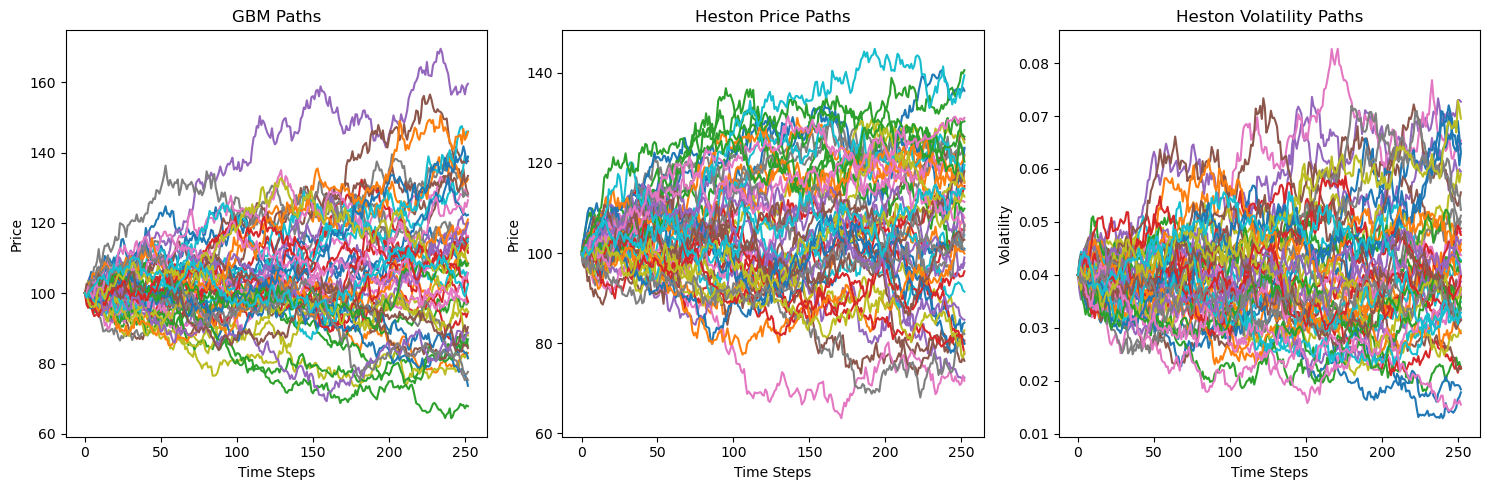

Saving data...
Data generation complete!
Black-Scholes dataset shape: (50000, 5)
Heston dataset shape: (50000, 9)


In [5]:
# Data Generation Notebook - Updated

import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_generation.monte_carlo import generate_geometric_brownian_motion, generate_heston_paths
from data_generation.black_scholes import generate_black_scholes_dataset
from data_generation.heston_model import generate_heston_dataset

# Set parameters
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
steps = 252
n_paths = 10000

# 1. Generate Monte Carlo paths for benchmarking
print("Generating Monte Carlo paths...")
gbm_paths = generate_geometric_brownian_motion(S0, r, sigma, T, steps, n_paths)

# Generate Heston paths
heston_paths, heston_vols = generate_heston_paths(
    S0=S0, r=r, v0=0.04, kappa=1.0, theta=0.04, sigma=0.1, rho=-0.7,
    T=T, steps=steps, n_paths=n_paths
)

# 2. Generate training datasets
print("Generating Black-Scholes training dataset...")
X_bs, y_bs = generate_black_scholes_dataset(n_samples=50000)

print("Generating Heston training dataset...")
X_heston, y_heston = generate_heston_dataset(n_samples=50000)

# Visualize paths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(gbm_paths[:, :50])  # First 50 paths
plt.title('GBM Paths')
plt.xlabel('Time Steps')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
plt.plot(heston_paths[:, :50])  # First 50 paths
plt.title('Heston Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
plt.plot(heston_vols[:, :50])  # First 50 volatility paths
plt.title('Heston Volatility Paths')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')

plt.tight_layout()
plt.savefig('../results/paths_visualization.png')
plt.show()

# Save data
print("Saving data...")
np.save('../data/raw/gbm_paths.npy', gbm_paths)
np.save('../data/raw/heston_paths.npy', heston_paths)
np.save('../data/raw/heston_vols.npy', heston_vols)

np.save('../data/processed/X_black_scholes.npy', X_bs)
np.save('../data/processed/y_black_scholes.npy', y_bs)
np.save('../data/processed/X_heston.npy', X_heston)
np.save('../data/processed/y_heston.npy', y_heston)

print("Data generation complete!")
print(f"Black-Scholes dataset shape: {X_bs.shape}")
print(f"Heston dataset shape: {X_heston.shape}")